# Explotary Data Analysis with Time Series Data

In [24]:
#import some important libraries

import pandas_datareader as pdr
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

using pdr.get_data_yahoo you can export many dataset uploaded in last 5 years. 
Here we will import Tesla dataset. You can export any, in our case we choose Tesla

In [6]:
#getting the data from the pandas database
tesla_data=pdr.get_data_yahoo('TSLA')
tesla_data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-08-21,69.164001,66.370003,69.164001,67.571999,32477000.0,67.571999
2017-08-22,68.447998,67.473999,68.225998,68.269997,21610000.0,68.269997
2017-08-23,70.697998,67.660004,67.797997,70.554001,24772500.0,70.554001
2017-08-24,71.332001,69.947998,70.503998,70.585999,22923500.0,70.585999
2017-08-25,71.138000,69.459999,70.848000,69.610001,17420000.0,69.610001


great.. so we have Tesla dataset with 1257 samples and 6 columns. Now we will apply some
EDA to explore more about this data.

In [8]:
#check the last few rows
tesla_data.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-08-11,894.710022,857.500000,889.539978,859.890015,23385000.0,859.890015
2022-08-12,900.479980,855.099976,868.250000,900.090027,26443300.0,900.090027
2022-08-15,939.400024,903.690002,905.359985,927.960022,29786400.0,927.960022
2022-08-16,944.000000,908.650024,935.000000,919.690002,29378800.0,919.690002
2022-08-17,928.969971,900.099976,910.190002,911.989990,22629741.0,911.989990


<AxesSubplot:xlabel='Date'>

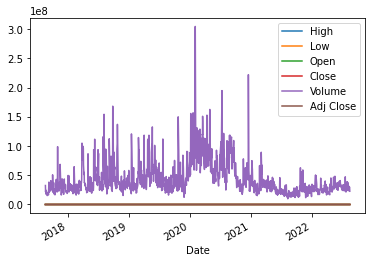

In [9]:
#let us plot this data and analyse what do we have! 
tesla_data.plot()

<AxesSubplot:xlabel='Date'>

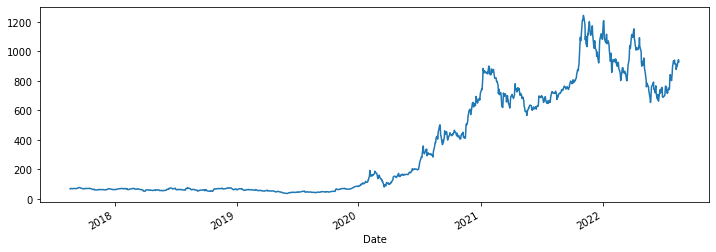

In [11]:
# so you can plot using .plot but it doesn't really provide the info in details..
#let us try to visualise in different way.
tesla_data['High'].plot(figsize=(12,4))

ok great! we have some knwoledge now...! So the Tesla price was going up from 2020 but now it
is decreasing because of some global issues as you know! 

<AxesSubplot:xlabel='Date'>

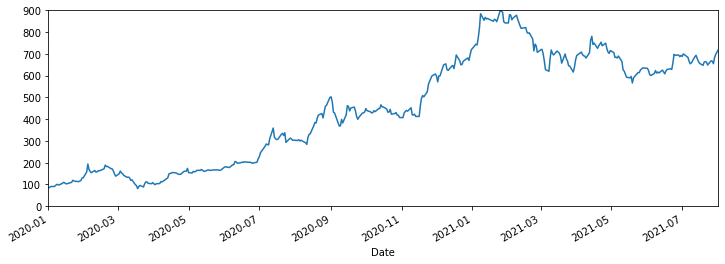

In [14]:
#here we will put the limits for proper graphs I will put both limits (x & y)
# I just wanna see this data from lets say 2020 to 2021 August! 
tesla_data['High'].plot(xlim=['2020-01-01', '2021-08-01'],ylim=[0,900],figsize=(12,4))

Great, so Now I can see my data from Jan 2020 to August 2021 

<AxesSubplot:xlabel='Date'>

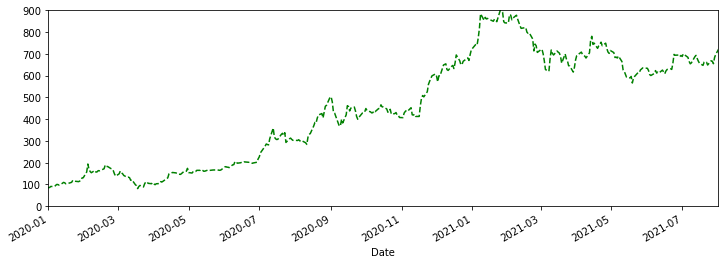

In [17]:
#Same graph can be put in different way, like you can change the color or line type
#here we will put the limits for proper graphs I will put both limits (x & y)
# I just wanna see this data from lets say 2020 to 2021 August! 
tesla_data['High'].plot(xlim=['2020-01-01', '2021-08-01'],ylim=[0,900],figsize=(12,4), ls='--', c= 'green')

In [21]:
#Now, let us see how can we read the index! 
index=tesla_data.loc['2020-01-01':'2021-08-01'].index
#index shows all the dates that we wanna see...! this is really useful when you want to 
#visulaize something with respect data and time.

In [23]:
index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2021-07-19', '2021-07-20', '2021-07-21', '2021-07-22',
               '2021-07-23', '2021-07-26', '2021-07-27', '2021-07-28',
               '2021-07-29', '2021-07-30'],
              dtype='datetime64[ns]', name='Date', length=398, freq=None)

In [26]:
#i separate open column in particular dates to visulise it separately
open_column=tesla_data.loc['2020-01-01':'2021-08-01']['Open']

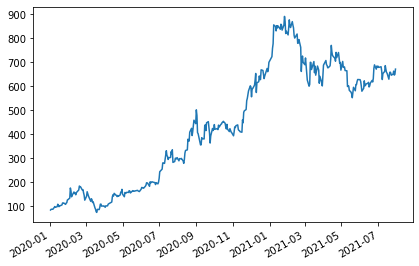

In [30]:
#let us now create some subplots using matplotlib 
figure, axis=plt.subplots()
plt.tight_layout()
figure.autofmt_xdate() #this line will prevent the x-axis date overlappin in the graph.
axis.plot(index, open_column)

In [31]:
# Let us now explore Datetime Index

In [35]:
df_tesla=tesla_data.reset_index() #this line gives you the datetime index as a separate column

In [36]:
#now if we look at the data information
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1257 non-null   datetime64[ns]
 1   High       1257 non-null   float64       
 2   Low        1257 non-null   float64       
 3   Open       1257 non-null   float64       
 4   Close      1257 non-null   float64       
 5   Volume     1257 non-null   float64       
 6   Adj Close  1257 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 68.9 KB


In [37]:
#check now the date is provided in datetime format. If you don't convert it into this format
#it would be in string format

In [38]:
df_tesla.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2017-08-21,69.164001,66.370003,69.164001,67.571999,32477000.0,67.571999
1,2017-08-22,68.447998,67.473999,68.225998,68.269997,21610000.0,68.269997
2,2017-08-23,70.697998,67.660004,67.797997,70.554001,24772500.0,70.554001
3,2017-08-24,71.332001,69.947998,70.503998,70.585999,22923500.0,70.585999
4,2017-08-25,71.138000,69.459999,70.848000,69.610001,17420000.0,69.610001


In [50]:
#let us convert date column as index
df_tesla=df_tesla.set_index('Date', drop=True)

In [51]:
df_tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-08-21,69.164001,66.370003,69.164001,67.571999,32477000.0,67.571999
2017-08-22,68.447998,67.473999,68.225998,68.269997,21610000.0,68.269997
2017-08-23,70.697998,67.660004,67.797997,70.554001,24772500.0,70.554001
2017-08-24,71.332001,69.947998,70.503998,70.585999,22923500.0,70.585999
2017-08-25,71.138000,69.459999,70.848000,69.610001,17420000.0,69.610001


In [43]:
#so now you can play with this datetime function
date=datetime(2021,11,20)

In [40]:
datetime.now()

datetime.datetime(2022, 8, 18, 0, 35, 44, 827211)

In [44]:
date.date()

datetime.date(2021, 11, 20)

In [45]:
date.day #check the day

20

In [47]:
date.weekday() #check weekday

5

In [48]:
date.year #check the year --> so you can check many things with datetime

2021

Now let us talk a bit about time resampling

# Time Resampling

You can learn about Resample function of pandas from here:
    https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html

In [52]:
df_tesla.resample(rule='A').min()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-31,60.891998,58.526001,59.900002,59.852001,15247500.0,59.852001
2018-12-31,52.066002,48.917999,50.556000,50.112000,15403500.0,50.112000
2019-12-31,37.335999,35.397999,36.220001,35.793999,12328000.0,35.793999
2020-12-31,80.972000,70.101997,74.940002,72.244003,17357700.0,72.244003
2021-12-31,566.210022,539.489990,552.549988,563.000000,9800600.0,563.000000
2022-12-31,653.919983,620.570007,623.849976,628.159973,16330900.0,628.159973


now this gives the great information. It give the minimum of all 
the columns on the last day of each year. 

In [53]:
#you can check the maximum for each year as well! 

In [54]:
df_tesla.resample(rule='A').max()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-31,77.921997,75.536003,76.050003,77.000000,98957000.0,77.000000
2018-12-31,77.491997,73.424004,75.000000,75.914001,168248500.0,75.914001
2019-12-31,87.061996,85.269997,87.000000,86.188004,150030500.0,86.188004
2020-12-31,718.719971,691.119995,699.989990,705.669983,304694000.0,705.669983
2021-12-31,1243.489990,1217.000000,1234.410034,1229.910034,89396500.0,1229.910034
2022-12-31,1208.000000,1136.040039,1189.550049,1199.780029,50521900.0,1199.780029


<AxesSubplot:xlabel='Date'>

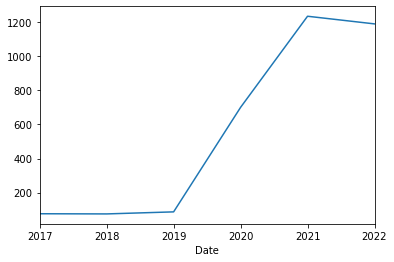

In [55]:
#let us plot this data
df_tesla.resample(rule='A').max()['Open'].plot()

In [56]:
#great so, this given amazing info about the rise of Open in a particular year! 

<AxesSubplot:xlabel='Date'>

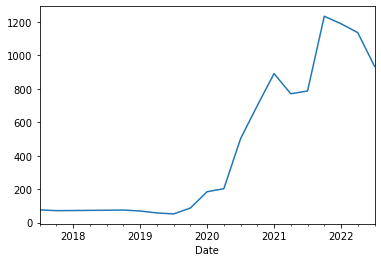

In [57]:
#Same can be achieved for quaterly info
df_tesla.resample(rule='QS').max()['Open'].plot()

<AxesSubplot:xlabel='Date'>

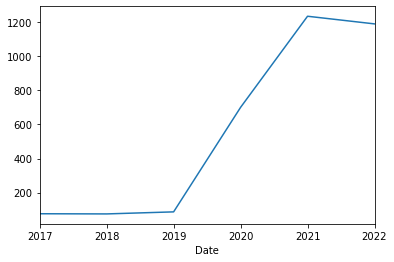

In [58]:
#In terms of Business End 
df_tesla.resample(rule='BA').max()['Open'].plot()

<AxesSubplot:xlabel='Date'>

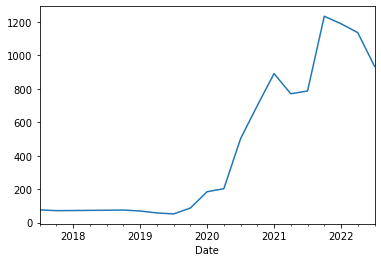

In [59]:
#In terms of Business Quarters
df_tesla.resample(rule='BQS').max()['Open'].plot()

In [60]:
#so you can plot the info for different ways using this resample function

<AxesSubplot:xlabel='Date'>

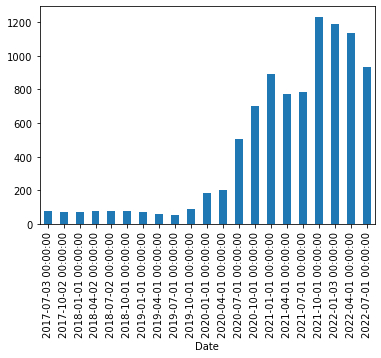

In [61]:
#you can change the type of graphs such as bar
#In terms of Business Quarters
df_tesla.resample(rule='BQS').max()['Open'].plot(kind='bar')

In [62]:
#let us explore a bit more 

df_tesla['High'].rolling(5).mean() #rolling gives you the window you can get many things using this 
#function

Date
2017-08-21           NaN
2017-08-22           NaN
2017-08-23           NaN
2017-08-24           NaN
2017-08-25     70.156000
                 ...    
2022-08-11    898.770007
2022-08-12    896.102002
2022-08-15    900.862012
2022-08-16    914.224011
2022-08-17    921.512000
Name: High, Length: 1257, dtype: float64

In [64]:
#let us create  30 days rolling
df_tesla['Open: 30 days rolling']=df_tesla['Open'].rolling(30).mean() 
df_tesla

,High,Low,Open,Close,Volume,Adj Close,Open: 30 days rolling
Date,,,,,,,
2017-08-21,69.164001,66.370003,69.164001,67.571999,32477000.0,67.571999,NaN
2017-08-22,68.447998,67.473999,68.225998,68.269997,21610000.0,68.269997,NaN
2017-08-23,70.697998,67.660004,67.797997,70.554001,24772500.0,70.554001,NaN
2017-08-24,71.332001,69.947998,70.503998,70.585999,22923500.0,70.585999,NaN
2017-08-25,71.138000,69.459999,70.848000,69.610001,17420000.0,69.610001,NaN
...,...,...,...,...,...,...,...
2022-08-11,894.710022,857.500000,889.539978,859.890015,23385000.0,859.890015,789.506667
2022-08-12,900.479980,855.099976,868.250000,900.090027,26443300.0,900.090027,795.997333
2022-08-15,939.400024,903.690002,905.359985,927.960022,29786400.0,927.960022,803.475999


<AxesSubplot:xlabel='Date'>

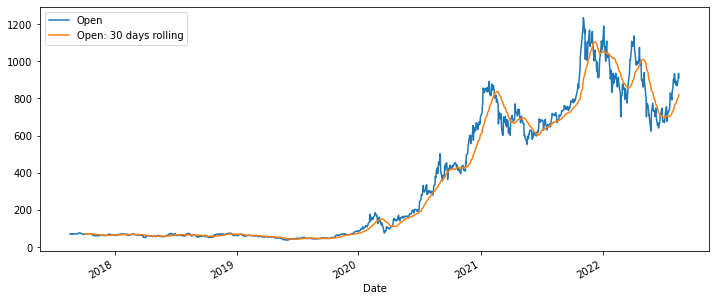

In [65]:
#let us plot this data and check the difference
df_tesla[['Open','Open: 30 days rolling']].plot(figsize=(12,5))

In [66]:
# so you can check the smoothing with rolling function! 

In [ ]:
This is quite basic. The second part will be made public soon ! 
But you can now imagine how powerful these tools are while applying on data! 
so enjoy learning.
you can get the full code at my github account: